# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


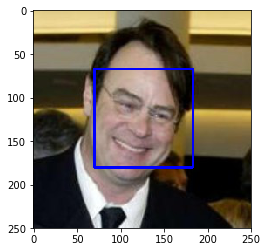

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_short_true = 0
for i in range(len(human_files_short)):
    if face_detector(human_files_short[i]) == True:
        human_files_short_true += 1 
dog_files_short_true = 0        
for i in range(len(dog_files_short)):
    if face_detector(dog_files_short[i]) == True:
        dog_files_short_true +=1

print('Face cascade detector performance on human file short : ', human_files_short_true/len(human_files_short) * 100)
print('Face cascade detector performance on dog file short : ', dog_files_short_true/len(dog_files_short) * 100)



Face cascade detector performance on human file short :  98.0
Face cascade detector performance on dog file short :  17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 60340841.68it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load image
    image = Image.open(img_path).convert('RGB')
    # Resize and normalize for pre trained model VGG pytorch
    in_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), 
                                                            (0.229, 0.224, 0.225))])
    # transform image
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    # Check is use of cuda or not
    if use_cuda:
        image.cuda()

    output = VGG16(image)
    # Get index
    _, pred = torch.max(output,1)
    pred = np.squeeze(pred.numpy())

    return pred if (pred >=0 and pred <=999) else False# predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return True if (index>=151 and index<=268) else False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [34]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_short_true = 0
for i in tqdm(range(len(human_files_short))):
    if dog_detector(human_files_short[i]) == True:
        human_files_short_true += 1 
dog_files_short_true = 0        
for i in tqdm(range(len(dog_files_short))):
    if dog_detector(dog_files_short[i]) == True:
        dog_files_short_true +=1

print('VGG detector performance on human file short : {:.2f}'.format(human_files_short_true/(len(human_files_short)+1) * 100))
print('VGG detector performance on dog file short : {:.2f}'.format(dog_files_short_true/(len(dog_files_short)+1) * 100))




100%|██████████| 100/100 [01:20<00:00,  1.28it/s]

VGG detector performance on human file short : 1.98
VGG detector performance on dog file short : 95.05


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Load images paths
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')
# Transform data
size = 224
train_data_transform = transforms.Compose([transforms.RandomResizedCrop(size),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.RandomVerticalFlip(),
                                           transforms.RandomRotation(10),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                          ])
valid_data_transform = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
test_data_transform = transforms.Compose([ transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_data_transform)


In [9]:
print('Number of training %d files'%(len(train_data)))
print('Number of validation %d files'%(len(valid_data)))
print('Number of testing %d files'%(len(test_data)))

Number of training 6680 files
Number of validation 835 files
Number of testing 836 files


In [10]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)


# Check equivalence between train_loader and valid_loader
A = train_loader.dataset.classes
B = valid_loader.dataset.classes
print('train_loader equivalent to valid_loader : ',A==B) 

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

train_loader equivalent to valid_loader :  True


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

All images had been resized and cropped to 224x224 pixels. 3 color channels (RGB) will be used for the model for the input tensor shape 224x224x3.

Image augmentation method is used to improve the model during the training phase. The picture augmentation consists in rotating, shifting or flipping pictures for training. The goal is to have the ability to evaluate future pictures taken not always in the same condition. Image augementation only applied to training data by : 
        
        . Random resized and cropped image.
        . Random vertical/horizontal flip.
        . Random rotation of 10 degree.
        . Normalization with mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225] to facilitate backpropagation.
        
        

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.20)
        
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 133)
        
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # Flatten image input
        x = x.view(-1, 256 * 7 * 7)
        # Dropout
        x = self.dropout(x)
        # Layer fc1
        x = F.relu(self.fc1(x))
        # Dropout
        x = self.dropout(x)
        # Layer fc2
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

    . Five Convolutional2d layers composed by 16/32/64/128/256 Filters are used with kernel size 3x3, stride of 1 and padding at 1.
    . MaxPooling2D layer, at each Convolutional2d layer, with a pool size of 2 (window size of 2) take the maximum value in the window and define it as an input for the next convolutional layer.
    . Relu activation function is used, after each MaxPooling2D layer, for its better gradiant back propagation, except for the last layer of the model.
    . Dropout turn off each node with a probability of 20% for each epoch in order to avoid overfitting.
    . Two fully connected layers composed by are used at the end of the model.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [9]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from time import *
from tqdm import tqdm
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        time_start = time()
        train_loss = 0.0
        valid_loss = 0.0
#         print(epoch)
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
   
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        train_loss = train_loss/len(train_loader.sampler)  
        valid_loss = valid_loss/len(valid_loader.sampler)
        # Save
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                   valid_loss_min, valid_loss))
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
        time_end = time()
        print('Epoch %d duration %.2f'%(epoch, time_end-time_start))
    # return trained model
    return model


# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_V1.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch_V1.pt'))

  2%|▏         | 1/50 [08:09<6:40:05, 489.92s/it]

Epoch: 1 	Training Loss: 4.889575 	Validation Loss: 4.886440
Validation loss decreased (inf --> 0.005852).  Saving model ...
Epoch 1 duration 489.92


  4%|▍         | 2/50 [16:15<6:30:47, 488.49s/it]

Epoch: 2 	Training Loss: 4.883717 	Validation Loss: 4.877614
Validation loss decreased (0.005852 --> 0.005841).  Saving model ...
Epoch 2 duration 485.15


  6%|▌         | 3/50 [24:21<6:22:15, 487.98s/it]

Epoch: 3 	Training Loss: 4.875268 	Validation Loss: 4.867502
Validation loss decreased (0.005841 --> 0.005829).  Saving model ...
Epoch 3 duration 486.81


  8%|▊         | 4/50 [32:29<6:14:06, 487.97s/it]

Epoch: 4 	Training Loss: 4.870072 	Validation Loss: 4.864411
Validation loss decreased (0.005829 --> 0.005826).  Saving model ...
Epoch 4 duration 487.95


 10%|█         | 5/50 [40:39<6:06:15, 488.35s/it]

Epoch: 5 	Training Loss: 4.864499 	Validation Loss: 4.858871
Validation loss decreased (0.005826 --> 0.005819).  Saving model ...
Epoch 5 duration 489.23


 12%|█▏        | 6/50 [48:47<5:58:13, 488.48s/it]

Epoch: 6 	Training Loss: 4.856142 	Validation Loss: 4.844414
Validation loss decreased (0.005819 --> 0.005802).  Saving model ...
Epoch 6 duration 488.79


 14%|█▍        | 7/50 [56:53<5:49:31, 487.70s/it]

Epoch: 7 	Training Loss: 4.826825 	Validation Loss: 4.781828
Validation loss decreased (0.005802 --> 0.005727).  Saving model ...
Epoch 7 duration 485.87


 16%|█▌        | 8/50 [1:05:03<5:41:50, 488.34s/it]

Epoch: 8 	Training Loss: 4.788359 	Validation Loss: 4.727552
Validation loss decreased (0.005727 --> 0.005662).  Saving model ...
Epoch 8 duration 489.85


 18%|█▊        | 9/50 [1:13:10<5:33:29, 488.04s/it]

Epoch: 9 	Training Loss: 4.758753 	Validation Loss: 4.695580
Validation loss decreased (0.005662 --> 0.005623).  Saving model ...
Epoch 9 duration 487.32


 20%|██        | 10/50 [1:21:16<5:24:58, 487.45s/it]

Epoch: 10 	Training Loss: 4.746293 	Validation Loss: 4.687639
Validation loss decreased (0.005623 --> 0.005614).  Saving model ...
Epoch 10 duration 486.08


 22%|██▏       | 11/50 [1:29:25<5:16:58, 487.64s/it]

Epoch: 11 	Training Loss: 4.733218 	Validation Loss: 4.656207
Validation loss decreased (0.005614 --> 0.005576).  Saving model ...
Epoch 11 duration 488.09


 24%|██▍       | 12/50 [1:37:32<5:08:50, 487.66s/it]

Epoch: 12 	Training Loss: 4.711010 	Validation Loss: 4.642720
Validation loss decreased (0.005576 --> 0.005560).  Saving model ...
Epoch 12 duration 487.68


 26%|██▌       | 13/50 [1:45:40<5:00:45, 487.72s/it]

Epoch: 13 	Training Loss: 4.705074 	Validation Loss: 4.629639
Validation loss decreased (0.005560 --> 0.005544).  Saving model ...
Epoch 13 duration 487.86


 28%|██▊       | 14/50 [1:53:49<4:52:48, 488.01s/it]

Epoch: 14 	Training Loss: 4.684087 	Validation Loss: 4.625716
Validation loss decreased (0.005544 --> 0.005540).  Saving model ...
Epoch 14 duration 488.70


 30%|███       | 15/50 [2:01:57<4:44:44, 488.12s/it]

Epoch: 15 	Training Loss: 4.661522 	Validation Loss: 4.582791
Validation loss decreased (0.005540 --> 0.005488).  Saving model ...
Epoch 15 duration 488.39


 32%|███▏      | 16/50 [2:10:07<4:36:49, 488.53s/it]

Epoch: 16 	Training Loss: 4.628943 	Validation Loss: 4.518949
Validation loss decreased (0.005488 --> 0.005412).  Saving model ...
Epoch 16 duration 489.47


 34%|███▍      | 17/50 [2:18:21<4:29:34, 490.12s/it]

Epoch: 17 	Training Loss: 4.585917 	Validation Loss: 4.502301
Validation loss decreased (0.005412 --> 0.005392).  Saving model ...
Epoch 17 duration 493.84


 36%|███▌      | 18/50 [2:26:26<4:20:35, 488.60s/it]

Epoch: 18 	Training Loss: 4.549099 	Validation Loss: 4.449237
Validation loss decreased (0.005392 --> 0.005328).  Saving model ...
Epoch 18 duration 485.04


 38%|███▊      | 19/50 [2:34:32<4:12:11, 488.10s/it]

Epoch: 19 	Training Loss: 4.520967 	Validation Loss: 4.470707
Epoch 19 duration 486.93


 40%|████      | 20/50 [2:42:38<4:03:40, 487.35s/it]

Epoch: 20 	Training Loss: 4.514839 	Validation Loss: 4.400747
Validation loss decreased (0.005328 --> 0.005270).  Saving model ...
Epoch 20 duration 485.59


 42%|████▏     | 21/50 [2:50:45<3:55:26, 487.11s/it]

Epoch: 21 	Training Loss: 4.484032 	Validation Loss: 4.373876
Validation loss decreased (0.005270 --> 0.005238).  Saving model ...
Epoch 21 duration 486.56


 44%|████▍     | 22/50 [2:58:51<3:47:13, 486.91s/it]

Epoch: 22 	Training Loss: 4.462871 	Validation Loss: 4.361214
Validation loss decreased (0.005238 --> 0.005223).  Saving model ...
Epoch 22 duration 486.44


 46%|████▌     | 23/50 [3:07:01<3:39:30, 487.79s/it]

Epoch: 23 	Training Loss: 4.444462 	Validation Loss: 4.389433
Epoch 23 duration 489.85


 48%|████▊     | 24/50 [3:15:09<3:31:25, 487.90s/it]

Epoch: 24 	Training Loss: 4.437792 	Validation Loss: 4.315442
Validation loss decreased (0.005223 --> 0.005168).  Saving model ...
Epoch 24 duration 488.14


 50%|█████     | 25/50 [3:23:14<3:22:55, 487.03s/it]

Epoch: 25 	Training Loss: 4.415537 	Validation Loss: 4.285432
Validation loss decreased (0.005168 --> 0.005132).  Saving model ...
Epoch 25 duration 485.02


 52%|█████▏    | 26/50 [3:31:20<3:14:43, 486.82s/it]

Epoch: 26 	Training Loss: 4.387479 	Validation Loss: 4.285232
Validation loss decreased (0.005132 --> 0.005132).  Saving model ...
Epoch 26 duration 486.31


 54%|█████▍    | 27/50 [3:39:26<3:06:29, 486.49s/it]

Epoch: 27 	Training Loss: 4.386353 	Validation Loss: 4.232982
Validation loss decreased (0.005132 --> 0.005069).  Saving model ...
Epoch 27 duration 485.74


 56%|█████▌    | 28/50 [3:47:32<2:58:20, 486.40s/it]

Epoch: 28 	Training Loss: 4.360270 	Validation Loss: 4.233963
Epoch 28 duration 486.17


 58%|█████▊    | 29/50 [3:55:38<2:50:09, 486.16s/it]

Epoch: 29 	Training Loss: 4.319664 	Validation Loss: 4.248847
Epoch 29 duration 485.61


 60%|██████    | 30/50 [4:03:44<2:42:05, 486.27s/it]

Epoch: 30 	Training Loss: 4.312637 	Validation Loss: 4.204947
Validation loss decreased (0.005069 --> 0.005036).  Saving model ...
Epoch 30 duration 486.51


 62%|██████▏   | 31/50 [4:11:54<2:34:20, 487.37s/it]

Epoch: 31 	Training Loss: 4.301067 	Validation Loss: 4.138378
Validation loss decreased (0.005036 --> 0.004956).  Saving model ...
Epoch 31 duration 489.95


 64%|██████▍   | 32/50 [4:20:01<2:26:10, 487.24s/it]

Epoch: 32 	Training Loss: 4.267087 	Validation Loss: 4.124556
Validation loss decreased (0.004956 --> 0.004940).  Saving model ...
Epoch 32 duration 486.94


 66%|██████▌   | 33/50 [4:28:09<2:18:05, 487.36s/it]

Epoch: 33 	Training Loss: 4.250607 	Validation Loss: 4.122261
Validation loss decreased (0.004940 --> 0.004937).  Saving model ...
Epoch 33 duration 487.62


 68%|██████▊   | 34/50 [4:36:17<2:10:02, 487.67s/it]

Epoch: 34 	Training Loss: 4.214053 	Validation Loss: 4.217785
Epoch 34 duration 488.41


 70%|███████   | 35/50 [4:44:26<2:01:57, 487.85s/it]

Epoch: 35 	Training Loss: 4.200035 	Validation Loss: 4.054635
Validation loss decreased (0.004937 --> 0.004856).  Saving model ...
Epoch 35 duration 488.25


 72%|███████▏  | 36/50 [4:52:33<1:53:48, 487.77s/it]

Epoch: 36 	Training Loss: 4.170427 	Validation Loss: 4.079746
Epoch 36 duration 487.59


 74%|███████▍  | 37/50 [5:00:42<1:45:46, 488.18s/it]

Epoch: 37 	Training Loss: 4.150881 	Validation Loss: 4.003299
Validation loss decreased (0.004856 --> 0.004794).  Saving model ...
Epoch 37 duration 489.13


 76%|███████▌  | 38/50 [5:08:55<1:37:54, 489.54s/it]

Epoch: 38 	Training Loss: 4.111280 	Validation Loss: 3.979956
Validation loss decreased (0.004794 --> 0.004766).  Saving model ...
Epoch 38 duration 492.73


 78%|███████▊  | 39/50 [5:17:02<1:29:35, 488.70s/it]

Epoch: 39 	Training Loss: 4.099867 	Validation Loss: 3.992271
Epoch 39 duration 486.74


 80%|████████  | 40/50 [5:25:09<1:21:21, 488.11s/it]

Epoch: 40 	Training Loss: 4.086626 	Validation Loss: 3.961317
Validation loss decreased (0.004766 --> 0.004744).  Saving model ...
Epoch 40 duration 486.71


 82%|████████▏ | 41/50 [5:33:15<1:13:09, 487.67s/it]

Epoch: 41 	Training Loss: 4.065331 	Validation Loss: 3.994584
Epoch 41 duration 486.67


 84%|████████▍ | 42/50 [5:41:22<1:04:59, 487.48s/it]

Epoch: 42 	Training Loss: 4.050212 	Validation Loss: 3.945109
Validation loss decreased (0.004744 --> 0.004725).  Saving model ...
Epoch 42 duration 487.01


 86%|████████▌ | 43/50 [5:49:30<56:52, 487.55s/it]  

Epoch: 43 	Training Loss: 3.993192 	Validation Loss: 3.896933
Validation loss decreased (0.004725 --> 0.004667).  Saving model ...
Epoch 43 duration 487.72


 88%|████████▊ | 44/50 [5:57:39<48:48, 488.08s/it]

Epoch: 44 	Training Loss: 3.998046 	Validation Loss: 3.876788
Validation loss decreased (0.004667 --> 0.004643).  Saving model ...
Epoch 44 duration 489.31


 90%|█████████ | 45/50 [6:05:52<40:47, 489.44s/it]

Epoch: 45 	Training Loss: 3.949675 	Validation Loss: 3.809453
Validation loss decreased (0.004643 --> 0.004562).  Saving model ...
Epoch 45 duration 492.61


 92%|█████████▏| 46/50 [6:14:00<32:35, 488.91s/it]

Epoch: 46 	Training Loss: 3.942653 	Validation Loss: 3.826308
Epoch 46 duration 487.66


 94%|█████████▍| 47/50 [6:22:04<24:22, 487.63s/it]

Epoch: 47 	Training Loss: 3.906619 	Validation Loss: 3.804070
Validation loss decreased (0.004562 --> 0.004556).  Saving model ...
Epoch 47 duration 484.66


 96%|█████████▌| 48/50 [6:30:09<16:13, 486.80s/it]

Epoch: 48 	Training Loss: 3.891299 	Validation Loss: 3.770820
Validation loss decreased (0.004556 --> 0.004516).  Saving model ...
Epoch 48 duration 484.85


 98%|█████████▊| 49/50 [6:38:15<08:06, 486.50s/it]

Epoch: 49 	Training Loss: 3.885359 	Validation Loss: 3.787508
Epoch 49 duration 485.82


100%|██████████| 50/50 [6:46:21<00:00, 486.28s/it]

Epoch: 50 	Training Loss: 3.844644 	Validation Loss: 3.816119
Epoch 50 duration 485.75


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.762601


Test Accuracy: 12% (102/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
## TODO: Specify data loaders
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [39]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# Loading Model
model_transfer = models.vgg19(pretrained=True)
print(model_transfer.classifier[6])
# Freeze training layer for all features
for param in model_transfer.features.parameters():
    param.requires_grad = False
# Create last layer
n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
# Modify last layer
model_transfer.classifier[6] = last_layer
print(model_transfer.classifier[6])
if use_cuda:
    model_transfer = model_transfer.cuda()
print(model_transfer)

Linear(in_features=4096, out_features=1000, bias=True)
Linear(in_features=4096, out_features=133, bias=True)
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

# __Answer:__ 

The final CNN architecture used is based on transfer learning technic, using the VGG19 pretrained model. Transfer learning is easy to implement to a new model for training with new pictures and relatively fast for computation. To reach the final model, several steps are necessary : 

- Import VGG19 model with the pretrained weights using models.vgg19(pretrained=True).
- Freeze the training layer for all features using param.requires_grad = False.
- Modify the last layer by modifying the number of output in "Classifier[6]".


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [40]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [33]:
# train the model

model_transfer = train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1 	Training Loss: 2.834980 	Validation Loss: 0.756022
Validation loss decreased (inf --> 0.000905).  Saving model ...


 20%|██        | 1/5 [03:35<14:23, 215.84s/it]

Epoch 1 duration 215.84
Epoch: 2 	Training Loss: 1.971157 	Validation Loss: 0.639173
Validation loss decreased (0.000905 --> 0.000765).  Saving model ...


 40%|████      | 2/5 [07:11<10:47, 215.84s/it]

Epoch 2 duration 215.85
Epoch: 3 	Training Loss: 1.808735 	Validation Loss: 0.562560
Validation loss decreased (0.000765 --> 0.000674).  Saving model ...


 60%|██████    | 3/5 [10:47<07:11, 215.76s/it]

Epoch 3 duration 215.58
Epoch: 4 	Training Loss: 1.734361 	Validation Loss: 0.520970
Validation loss decreased (0.000674 --> 0.000624).  Saving model ...


 80%|████████  | 4/5 [14:23<03:35, 215.79s/it]

Epoch 4 duration 215.85
Epoch: 5 	Training Loss: 1.645005 	Validation Loss: 0.493858
Validation loss decreased (0.000624 --> 0.000591).  Saving model ...


100%|██████████| 5/5 [17:59<00:00, 215.89s/it]

Epoch 5 duration 216.12


FileNotFoundError: [Errno 2] No such file or directory: 'model_transfer_V1.pt'

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [42]:
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))


In [43]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.533519


Test Accuracy: 83% (702/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [45]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_loader.dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    # Load image
    image = Image.open(img_path).convert('RGB')
    # Resize and normalize for pre trained model VGG pytorch
    in_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), 
                                                            (0.229, 0.224, 0.225))])
    # transform image
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    # Check is use of cuda or not
    
    if use_cuda:
        image.cuda()
        model_transfer.cuda()
    model_transfer.eval()
    output = model_transfer(image)
    # Get index
    _, pred = torch.max(output,1)
    pred = np.squeeze(pred.numpy())
    return pred 

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [52]:
from glob import glob

def select_dog_file(dog_name):
    # Select a dog file from a dog name
    Dog_Folder = [s for s in glob('dogImages/valid/*') if dog_name.replace(' ','_') in s]
    Dog_file_Sample = os.listdir(Dog_Folder[0])
    Dogfile_path = '/'.join([Dog_Folder[0],Dog_file_Sample[0]])
    return Dogfile_path
    
def PlotResults(Tag,img_path,dog_name):
    # Test image
    img = cv2.imread(img_path) 
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(1,2,1)
    ax.imshow(cv_rgb)
    ax.title.set_text(Tag)
    # Prediction image sample
    ax = fig.add_subplot(1,2,2)
    img = cv2.imread(select_dog_file(dog_name))
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(cv_rgb)
    ax.title.set_text(dog_name)
    plt.show()

In [55]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path) == True:
        print('dog')
        pred = predict_breed_transfer(img_path)
        print(pred, class_names[pred])
        Tag = 'Hello Dog\n You look like a {}'.format(class_names[pred])
        PlotResults(Tag,img_path,class_names[pred])
    elif face_detector(img_path) == True:
        print('Human')
        pred = predict_breed_transfer(img_path)
        print(pred, class_names[pred])
        Tag = 'Hello Human\n You look like a {}'.format(class_names[pred])
        PlotResults(Tag,img_path,class_names[pred])
    else:
        print('What is it ?')
        Tag = '?????'
        img = cv2.imread(img_path)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.title(Tag)
        plt.show()        
    return 


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output seems to be correct for dog and human detection, also if the image is something else than a dog or human faces. But the breed's prediction when it is an dog image doesn't work correctly or for other type of image as seen below for the pigeon.

Possible points for improvement are : 
- More training time.
- More images for the training.
- Tweek hyperparameters to improve accuracy.
- Test other model architecture to improve computationnal time.

(Three possible points for improvement)

Human
123 Poodle


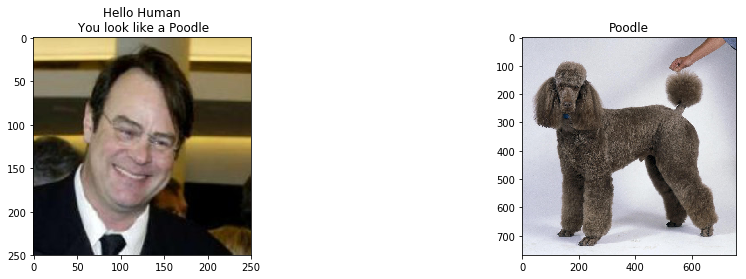

/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
Human
55 Dachshund


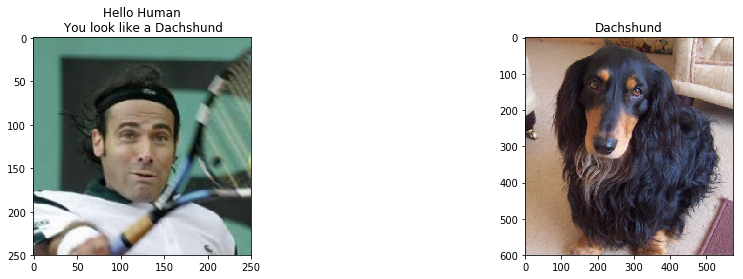

/data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg
Human
55 Dachshund


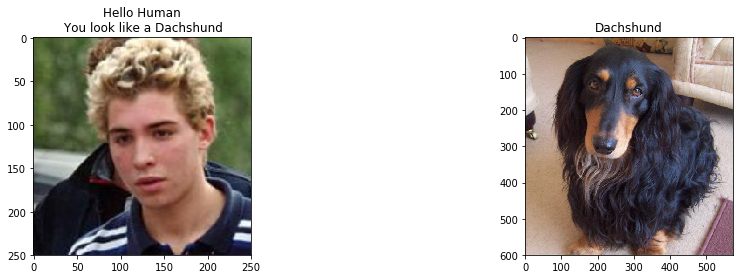

/data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg
dog
40 Bullmastiff


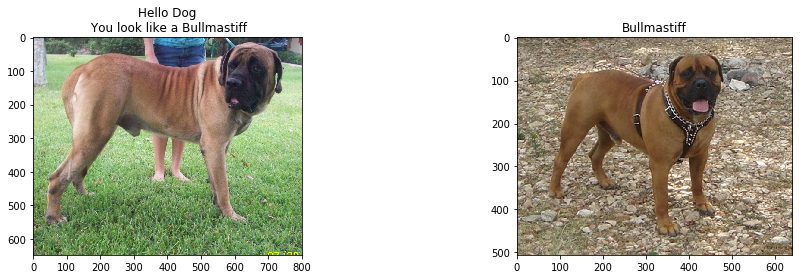

/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg
dog
39 Bulldog


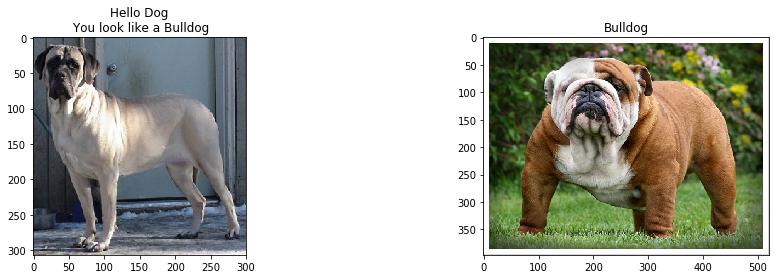

/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg
dog
102 Mastiff


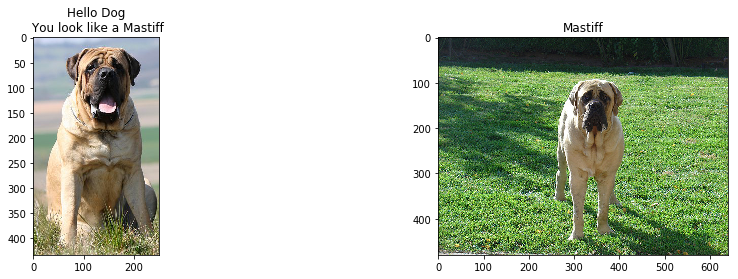

/data/dog_images/train/103.Mastiff/Mastiff_06871.jpg


In [48]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    print(file)

['image_test/G_588814_A.jpg', 'image_test/Domestic-pigeon.jpg', 'image_test/Unknown.jpg', 'image_test/chat-trop-chou-600x420.jpg']
What is it ?


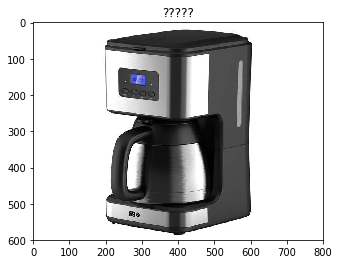

image_test/G_588814_A.jpg
Human
80 Greyhound


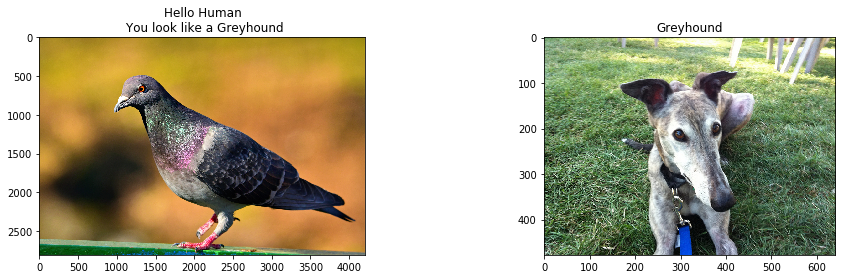

image_test/Domestic-pigeon.jpg
What is it ?


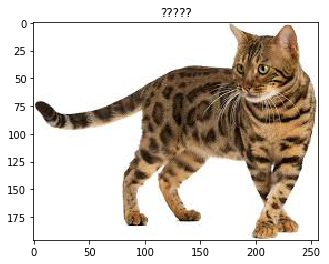

image_test/Unknown.jpg
What is it ?


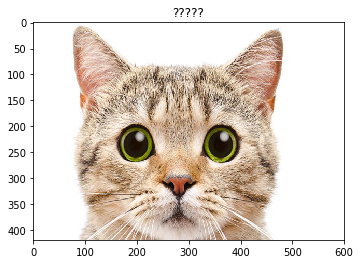

image_test/chat-trop-chou-600x420.jpg


In [56]:
# Test with other image
files_test = glob('image_test/*')
print(files_test)
for file in files_test:
    run_app(file)
    print(file)
